# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [83]:
# keras.datasets.fashion_mnist
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [84]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# APlanar imágenes
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

# crear dfs
df_train = pd.DataFrame(X_train_flat)
df_train['label'] = y_train

df_test = pd.DataFrame(X_test_flat)
df_test['label'] = y_test

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,3,0,3,174,189,67,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,...,12,0,0,0,0,0,0,0,0,6


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset.

In [86]:
labels_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

df_train['class_name'] = df_train['label'].map(labels_map)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,class_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Ankle boot
1,0,0,0,0,0,1,0,0,0,0,...,130,76,0,0,0,0,0,0,0,T-shirt/top
2,0,0,0,0,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,T-shirt/top
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,3,Dress
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt/top


In [87]:
df_train.shape

(60000, 786)

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [88]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

print('28 * 28:', 28 * 28)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)
28 * 28: 784


Cada img es de 28x28 pixeles. hay 60.000 imgs en el train y otros 10.000 en el conjunto test.

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

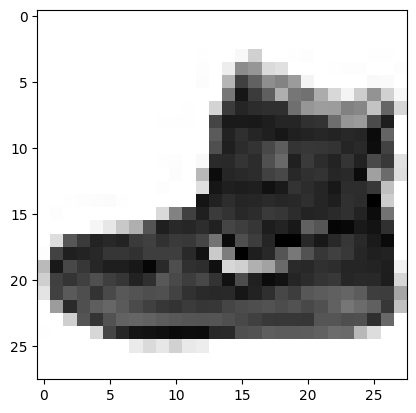

In [89]:
plt.imshow(X_train[0], cmap=plt.get_cmap('Grays'))

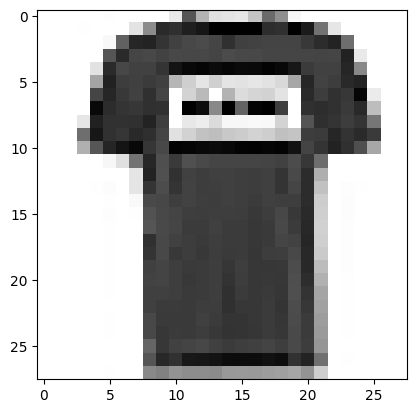

In [90]:
plt.imshow(X_train[1], cmap=plt.get_cmap('Grays'))

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [91]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [92]:
np.mean(X_train)

# comprobamos la normalizacion

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [93]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [94]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [95]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

C:\Users\Ana\AppData\Local\Temp\ipykernel_16892\2289673152.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[i], cmap=plt.cm.get_cmap('Greys'));


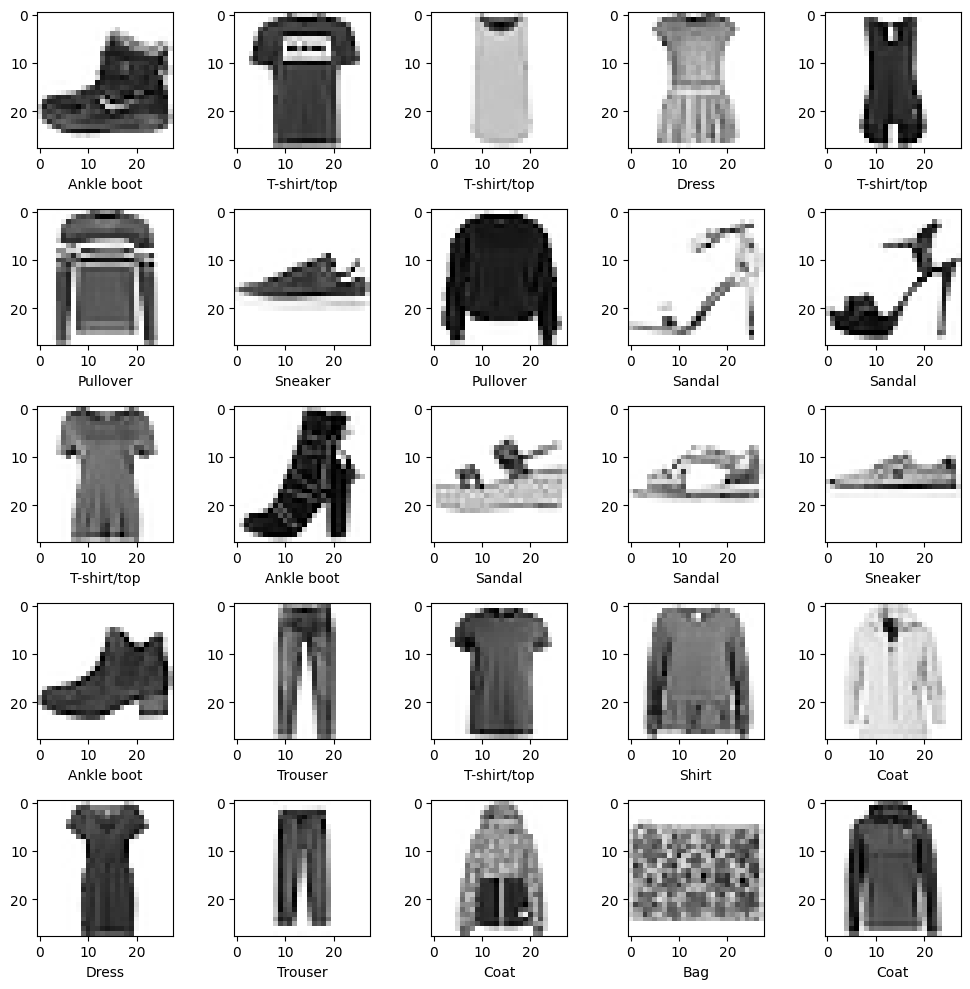

In [96]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.get_cmap('Greys'));
    plt.xlabel(labels_map[y_train[i]])

plt.tight_layout()
plt.show()  

In [97]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [98]:
model = keras.models.Sequential()

capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units= 300, activation='relu'),
    keras.layers.Dense(units= 150, activation='relu'),
    keras.layers.Dense(units= 10, activation='softmax')
]

model = keras.models.Sequential(capas)

c:\Users\Ana\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
print(model.layers[1])

<Dense name=dense_11, built=True>


In [100]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [101]:
weights

array([[-0.01158053, -0.05580788, -0.01605554, ..., -0.0657314 ,
         0.07153749, -0.05693645],
       [ 0.02599491, -0.06972433, -0.05187886, ...,  0.02808266,
        -0.06438796, -0.01036419],
       [-0.04320711,  0.06554383, -0.00064792, ...,  0.04649337,
         0.0144949 ,  0.03147189],
       ...,
       [-0.07394076, -0.03747045, -0.01859402, ...,  0.03653494,
        -0.03823557, -0.05676725],
       [-0.02959836,  0.01227477,  0.01960064, ...,  0.05789222,
        -0.03741231,  0.07057258],
       [ 0.03293217, -0.01032303, -0.00061399, ..., -0.01594759,
        -0.06098991,  0.05528557]], dtype=float32)

In [102]:
len(weights)

784

In [103]:
len(weights[0])

300

In [104]:
28 * 28

784

In [105]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("Min y_train:", y_train.min(), "Max y_train:", y_train.max())


X_train shape: (50000, 28, 28)
y_train shape: (50000,)
X_val shape: (10000, 28, 28)
y_val shape: (10000,)
Min y_train: 0.0 Max y_train: 9.0


### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [106]:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

In [107]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("Min y_train:", y_train.min(), "Max y_train:", y_train.max())


X_train shape: (50000, 28, 28)
y_train shape: (50000,)
X_val shape: (10000, 28, 28)
y_val shape: (10000,)
Min y_train: 0.0 Max y_train: 9.0


## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [108]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 10,
    validation_data = (X_val, y_val)
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5676 - loss: 1.4713 - val_accuracy: 0.7691 - val_loss: 0.7280
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7768 - loss: 0.6885 - val_accuracy: 0.7974 - val_loss: 0.6020
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8059 - loss: 0.5864 - val_accuracy: 0.8050 - val_loss: 0.5594
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8222 - loss: 0.5304 - val_accuracy: 0.8189 - val_loss: 0.5163
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8285 - loss: 0.5076 - val_accuracy: 0.8207 - val_loss: 0.5042
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8336 - loss: 0.4846 - val_accuracy: 0.8309 - val_loss: 0.4833
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8414 - loss: 0.4644 - val_accuracy: 0.8340 - val_loss: 0.4712
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8431 - loss: 0.4531 - val_accura

In [ ]:
X_train.shape

In [109]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 50,
    validation_data = (X_val, y_val)
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8477 - loss: 0.4373 - val_accuracy: 0.8429 - val_loss: 0.4477
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8516 - loss: 0.4236 - val_accuracy: 0.8482 - val_loss: 0.4219
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8585 - loss: 0.4094 - val_accuracy: 0.8419 - val_loss: 0.4417
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8612 - loss: 0.3978 - val_accuracy: 0.8534 - val_loss: 0.4151
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8653 - loss: 0.3866 - val_accuracy: 0.8332 - val_loss: 0.4544
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8677 - loss: 0.3794 - val_accuracy: 0.8629 - val_loss: 0.3917
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8701 - loss: 0.3718 - val_accuracy: 0.8492 - val_loss: 0.4250
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8699 - loss: 0.3654 - val_accuracy: 

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [110]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8706 - loss: 0.3591


0.8730999827384949

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [112]:
predictions = model.predict(X_test)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


(10000, 10)

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [113]:
{labels_map[np.argmax(model.predict(np.expand_dims(X_test[0], axis=0))) ]}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


{'Ankle boot'}

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [118]:
predictions[0]

array([4.1728204e-06, 1.1310594e-07, 1.1135955e-06, 2.6315543e-06,
       1.4008159e-06, 4.7652409e-03, 4.0277802e-05, 1.4203654e-02,
       1.2226166e-04, 9.8085910e-01], dtype=float32)

In [ ]:
predictions[0].argmax()

9.0

In [123]:
labels_map[predictions[0].argmax()]

'Ankle boot'

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:
**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

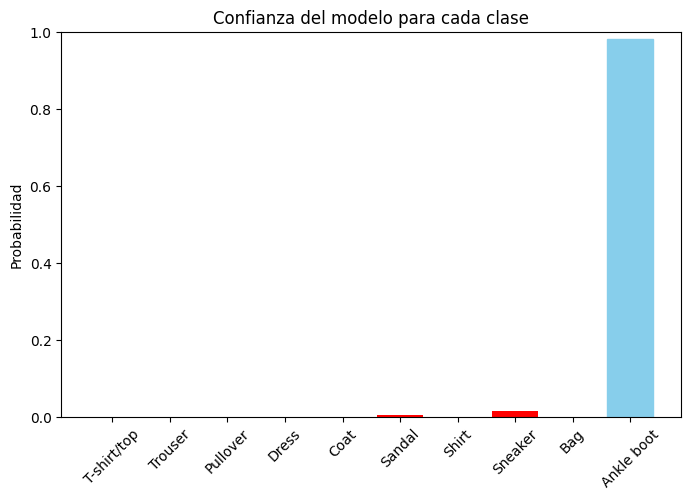

In [127]:
prediccion = predictions[0]

clases = list(labels_map.values())

plt.figure(figsize=(8,5))
bars = plt.bar(clases, prediccion, color='red')
plt.title('Confianza del modelo para cada clase')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45)
plt.ylim([0, 1])

max_idx = np.argmax(prediccion)
bars[max_idx].set_color('skyblue')

plt.show()


Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

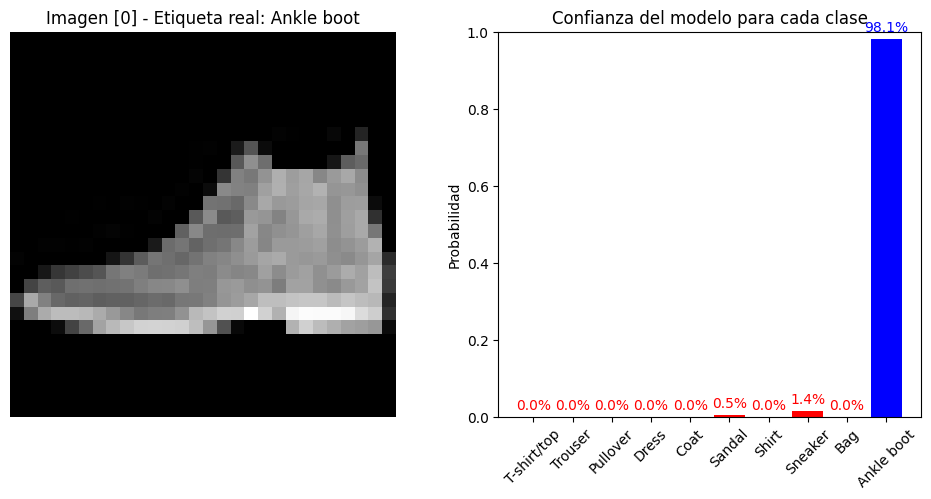

In [128]:
img = X_test[0]
etiqueta_real = y_test[0]

prediccion = predictions[0]
clases = list(labels_map.values())

colores = ['blue' if i == etiqueta_real else 'red' for i in range(len(clases))]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title(f"Imagen [0] - Etiqueta real: {labels_map[int(etiqueta_real)]}")
plt.axis('off')

plt.subplot(1,2,2)
bars = plt.bar(clases, prediccion, color=colores)
plt.title('Confianza del modelo para cada clase')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45)
plt.ylim([0, 1])

# Añadir porcentaje sobre las barras
for i, bar in enumerate(bars):
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.02, f'{altura*100:.1f}%', ha='center', color=colores[i])

plt.show()


Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

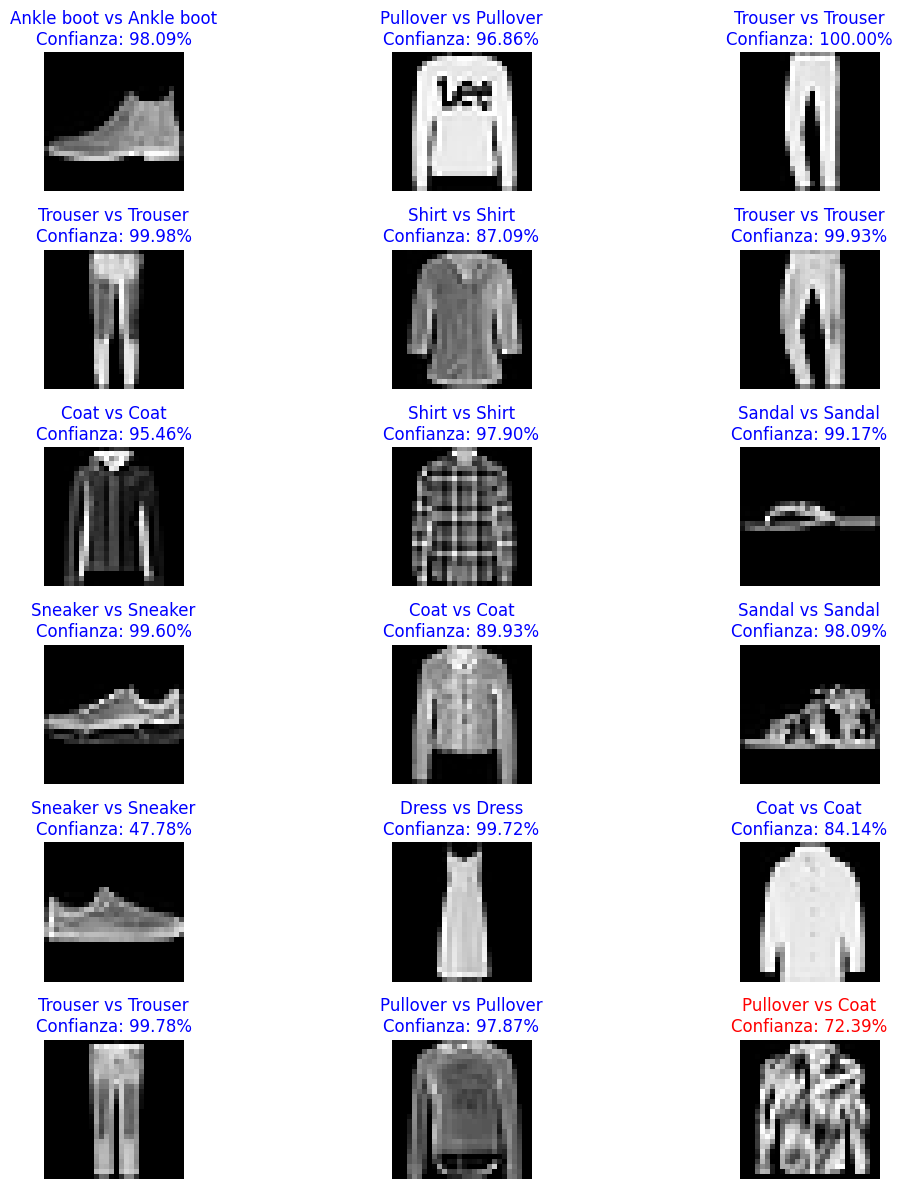

In [133]:
plt.figure(figsize=(12,12))

for i in range(18):
    img = X_test[i]
    etiq_real = y_test[i]

    prediccion = predictions[i]
    cl_pred = np.argmax(prediccion)
    conf = prediccion[cl_pred]

    color = 'blue' if labels_map[cl_pred] == labels_map[etiq_real] else 'red'
    
    plt.subplot(6, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{labels_map[cl_pred]} vs {labels_map[etiq_real]}\nConfianza: {conf:.2%}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()



Evalúa tu modelo con una matriz de confusión e interprétala.

In [134]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions.argmax(axis=1))

array([[738,   0,  16,  21,   1,   2, 214,   0,   8,   0],
       [  1, 965,   1,  25,   2,   0,   5,   0,   1,   0],
       [ 10,   2, 747,  16, 102,   0, 120,   0,   3,   0],
       [ 16,   5,   8, 880,  17,   0,  67,   0,   7,   0],
       [  1,   1,  70,  41, 756,   0, 128,   0,   3,   0],
       [  0,   0,   0,   1,   0, 962,   0,  22,   2,  13],
       [ 61,   2,  47,  23,  42,   0, 814,   0,  11,   0],
       [  0,   0,   0,   0,   0,  21,   0, 955,   1,  23],
       [  4,   0,   5,   6,   3,   2,  15,   4, 961,   0],
       [  0,   0,   0,   0,   0,   5,   1,  41,   0, 953]])

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [ ]:
img = X_test[99]
img_exp = img.reshape(1, 28, 28)
pred = model.predict(img_exp)
clase_predicha = np.argmax(pred)
print(f"La clase predicha para la imagen es: {labels_map[clase_predicha]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
La clase predicha para la imagen es: Pullover
